# Applied Plotting, Charting & Data Representation in Python

## Project

## Research Question 

Analyse the relation between GDP per capita and CO2 emmisions over the years

This analysis would form the base of understanding as to how much do the developed and developing countries contribute to CO2 emmision.

For the analysis, 2 data sets have been used 
        1) [CO2 emmisions per country](https://ourworldindata.org/grapher/annual-co2-emissions-per-country)
        2) [GDP per capita per country](https://ourworldindata.org/grapher/gdp-per-capita-worldbank)
        
For the purpose of this analysis we will be taking only the top 5 and bottom 5 GDP growth, and plot it against the CO2 emmision.
        

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### CO2 emmision data 

In [91]:
co2_df = pd.read_csv('annual-co2-emissions-per-country.csv')
co2_df = co2_df.drop('Code', axis=1)
co2_df = co2_df[(co2_df['Year']>2002) & (co2_df['Year']<=2011)]
co2_df = co2_df.rename(columns = {
    "Entity" : "Country",
    "Annual CO₂ emissions (tonnes)" : "CO2-emm"
})
co2_df = co2_df[(co2_df['Country'] == 'United States') | (co2_df['Country'] == 'India') | (co2_df['Country'] == 'China')]
co2_df

,Country,Year,CO2-emm
4037,China,2003,4.452310e+09
4038,China,2004,5.125894e+09
4039,China,2005,5.771168e+09
4040,China,2006,6.377748e+09
4041,China,2007,6.861751e+09
4042,China,2008,7.375190e+09
4043,China,2009,7.758812e+09
4044,China,2010,8.500543e+09
4045,China,2011,9.388199e+09
8823,India,2003,1.091873e+09


### GDP per capita data

In [93]:
gdp_df = pd.read_csv('gdp-per-capita-worldbank.csv')
#print(gdp_df.head())
gdp_df = gdp_df.drop('Code', axis = 1)
gdp_df = gdp_df.rename(columns = {
            "GDP per capita (int.-$) (constant 2011 international $)" : "GDPc",
            "Entity" : "Country" 
        })
gdp_df = gdp_df[(gdp_df['Year']>2002) & (gdp_df['Year']<=2011)]
gdp_df = gdp_df[(gdp_df['Country'] == 'United States') | (gdp_df['Country'] == 'India') | (gdp_df['Country'] == 'China')]
gdp_df

,Country,Year,GDPc
1056,China,2003,4718.326346
1057,China,2004,5164.641095
1058,China,2005,5719.455366
1059,China,2006,6411.042544
1060,China,2007,7285.274415
1061,China,2008,7947.787952
1062,China,2009,8651.725901
1063,China,2010,9525.818483
1064,China,2011,10384.366599
2594,India,2003,2783.004355


### Merging the dataframes 

In [94]:
df = pd.merge(gdp_df,
                  co2_df,
                  how="inner",
                  on=["Country", "Year"])
df['ratio'] = df['CO2-emm']*(10**-6)/df['GDPc']
df

,Country,Year,GDPc,CO2-emm,ratio
0,China,2003,4718.326346,4.452310e+09,0.943621
1,China,2004,5164.641095,5.125894e+09,0.992498
2,China,2005,5719.455366,5.771168e+09,1.009042
3,China,2006,6411.042544,6.377748e+09,0.994807
4,China,2007,7285.274415,6.861751e+09,0.941866
5,China,2008,7947.787952,7.375190e+09,0.927955
6,China,2009,8651.725901,7.758812e+09,0.896794
7,China,2010,9525.818483,8.500543e+09,0.892369
8,China,2011,10384.366599,9.388199e+09,0.904070
9,India,2003,2783.004355,1.091873e+09,0.392336


In [95]:
years = list(set(df['Year'].values))

gdp_china = df[(df['Country'] == 'China')]['GDPc']
gdp_india = df[(df['Country'] == 'India')]['GDPc']
gdp_usa = df[(df['Country'] == 'United States')]['GDPc']

ratio_china = df[(df['Country'] == 'China')]['ratio']
ratio_india =  df[(df['Country'] == 'India')]['ratio']
ratio_usa = df[(df['Country'] == 'United States')]['ratio']

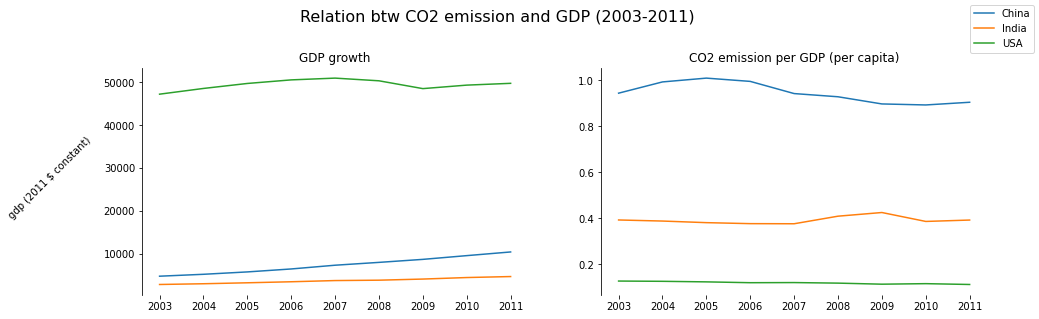

In [104]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(years, gdp_china, label="China")
ax1.plot(years, gdp_india, label="India")
ax1.plot(years, gdp_usa, label="USA")
ax1.set_ylabel("gdp (2011 $ constant)", rotation=45, labelpad=50)
ax1.set_xticks(years)
ax1.set_title("GDP growth")
ax2.plot(years, ratio_china)
ax2.plot(years, ratio_india)
ax2.plot(years, ratio_usa)
ax2.set_xticks(years)
ax2.set_title("CO2 emission per GDP (per capita)")
for spine in ["top", "right", "bottom"]:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)
fig.suptitle("Relation btw CO2 emission and GDP (2003-2011)",fontsize=16)
fig.tight_layout(pad=5.0)
fig.legend()
fig.savefig("project.png")

### Observation

The figure has 2 subplots , one represents the GDP per capita  over the years 2003-2011,  and the other the ratio of CO2 emission to GDP per capita.
Graph1: From this graph we can understand that USA has the highest GDP per capita over the years 2003-2011 , even though it has the highest GDP per capita it's growth rate is pretty much constant over the years . In the case on China during the early years its GDP was pretty low but nearing the end of the decade there has been a steep increase in GDP , indicating very high GDP growth rate. India also started along with China , with low GDP but with the end of decade there has been gradual increase in GDP. 

Graph2: Here we see somewhat of the opposite situation of graph 1, USA with highest GDP has lowest CO2 produced (CO2 produced per GDP) , where as China and India relatively very low GDP compared to USA have significantly high CO2 emission. Among China and India , China has much larger CO2 emission than India. 

Inference : From these two graphs we can understand that the relationship between GDP and CO2 emission is not direct , since USA with one the highest GDP has the lowest CO2 emission per GDP , the reason is that USA being a wealthy nation , it has more responsibility and the people and government invest more for a clean living environment, whereas this is not the case with developing countries like China and India (especially fast growing nations), do not  have the investment needed to create a cleaner environment . This can be understood from the graph 2, the position of China and India are much higher than,  USA . Another interesting analogy is that, even though China has higher GDP than India , it has higher CO2 emission , this is because from graph 1 we can see there is higher GDP growth rate for China than India , higher GDP growth rate means more energy spent on industry, market, etc in a very short time , leading to higher emissions . 

Conclusion : From the above graphs we can conclude that , 

1) There is no direct relation between GDP per capita and CO2 emission

2) Wealthy countries invest more or are forced to invest more on clean environment. 

3) Taking the case of China and India, it can be observed that there is a direct relation between GDP growth rate and CO2 emission.  